Menampilkan WordCloud data kotor


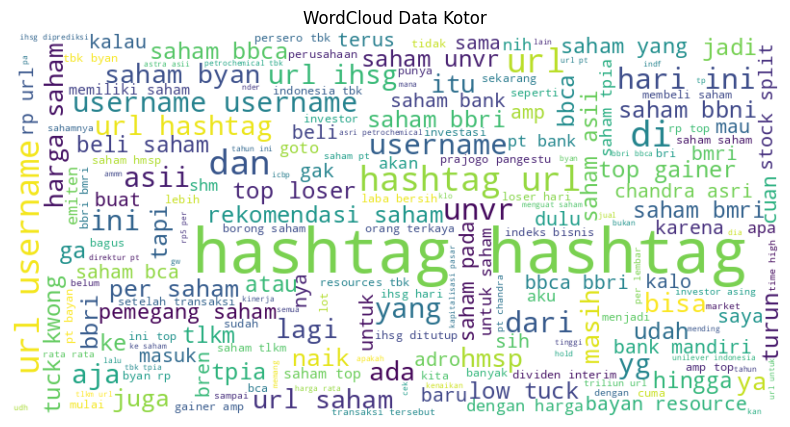

Loading data from: data_dci.csv
Cleaning data...
Data siap. Total baris: 3141
Menampilkan WordCloud setelah cleaning


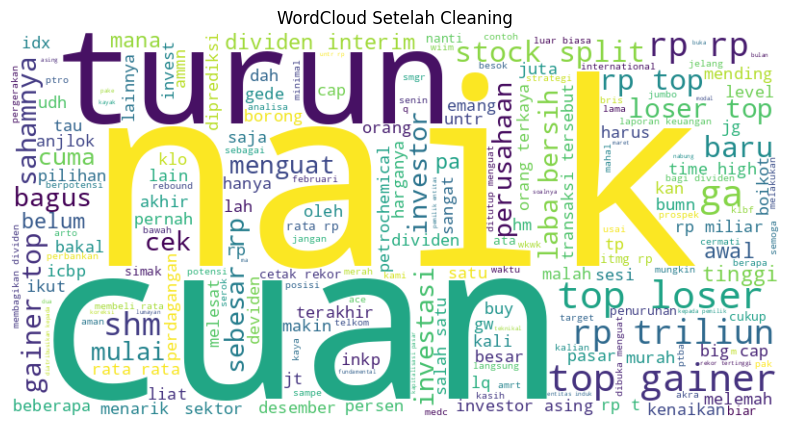

In [1]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==========================================
# 1. WORDCLOUD DATA KOTOR
# ==========================================
def wordcloud_raw_data(file_path):
    """
    WordCloud dari data mentah.

    """
    print("Menampilkan WordCloud data kotor")

    df = pd.read_csv(file_path)

    def basic_clean(text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    corpus = " ".join(df['Sentence'].apply(basic_clean))

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200
    ).generate(corpus)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud Data Kotor")
    plt.show()


# ==========================================
# 2. DEFINISI STOPWORDS & FUNGSI CLEANING
# ==========================================
STOPWORDS_ID = {
    'yang', 'dan', 'di', 'ke', 'dari', 'ini', 'itu', 'untuk', 'pada', 'dengan',
    'adalah', 'saya', 'kamu', 'dia', 'mereka', 'kita', 'akan', 'bisa', 'ada',
    'tidak', 'yg', 'ya', 'aja', 'gak', 'nya', 'kalo', 'kalau', 'udah', 'sudah',
    'bukan', 'tapi', 'tuh', 'dong', 'kok', 'sih', 'gue', 'lu', 'aku', 'apa',
    'bgt', 'banget', 'juga', 'lagi', 'mau', 'sama', 'banyak', 'bikin', 'buat',
    'jadi', 'terus', 'karena', 'seperti', 'atau', 'saat', 'dalam', 'masih',
    'begitu', 'semua', 'bbrp', 'utk', 'sdh', 'dgn', 'dr',
    'lebih', 'kemarin', 'per', 'punya', 'setelah', 'menjadi',
    'secara', 'lalu', 'memang', 'paling','nih','dulu','hingga','sampai','sekarang',
    'apakah','memiliki','kembali','sejak','kinerja','kira','coba','nder'
}

STOPWORDS_SAHAM = {
    'saham', 'harga', 'market', 'indeks', 'lot', 'hari', 'tahun',
    'beli', 'jual', 'hold', 'masuk', 'keluar', 'rekomendasi',
    'bbca', 'bbri', 'bmri', 'bbtn', 'tlkm', 'unvr', 'goto', 'bank', 'bca',
    'bbni', 'hmsp', 'tpia', 'bren', 'byan', 'indf', 'antm', 'asii','amp',
    'bri', 'mandiri', 'brpt', 'chandra', 'asri', 'tuck', 'wong','astra','ggrm',
    'ihsg', 'persero', 'tbk', 'lembar', 'pemegang', 'pbv', 'pukul', 'wib','pt',
    'syariah', 'low kwong','prajogo pangestu','indonesia','prajogo','pangestu','bayan','low',
    'kwong','adro','bisnis','emiten','rokok','unilever','rdtx','sampoerna','produk'
}

ALL_STOPWORDS = STOPWORDS_ID.union(STOPWORDS_SAHAM)


def load_and_clean_data(file_path):
    print(f"Loading data from: {file_path}")

    df = pd.read_csv(file_path)

    unused_cols = [
        'Quote Count', 'Reply Count', 'Retweet Count',
        'Favorite Count', 'English Translation', 'Tweet Date'
    ]
    df = df.drop(columns=[c for c in unused_cols if c in df.columns], errors='ignore')

    def clean_text(text):
        if not isinstance(text, str):
            return ""
        text = re.sub(r'\[URL\]|\[HASHTAG\]|\[USERNAME\]', '', text)
        text = text.lower()
        text = re.sub(r'[^a-z\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = [t for t in text.split() if t not in ALL_STOPWORDS]
        return ' '.join(tokens)

    print("Cleaning data...")
    df['cleaned_text'] = df['Sentence'].apply(clean_text)

    df = df.drop_duplicates(subset=['cleaned_text'])
    df = df[df['cleaned_text'].str.strip() != '']

    print(f"Data siap. Total baris: {len(df)}")
    return df[['cleaned_text', 'Sentiment']]


# ==========================================
# 3. WORDCLOUD SETELAH CLEANING
# ==========================================
def wordcloud_clean_data(df_clean):
    print("Menampilkan WordCloud setelah cleaning")

    corpus = " ".join(df_clean['cleaned_text'])

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200
    ).generate(corpus)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud Setelah Cleaning")
    plt.show()


# ==========================================
# 4. EKSEKUSI
# ==========================================
FILE_PATH = "data_dci.csv"

wordcloud_raw_data(FILE_PATH)

df_clean = load_and_clean_data(FILE_PATH)

wordcloud_clean_data(df_clean)


WordCloud data kotor. Sentiment: Positive


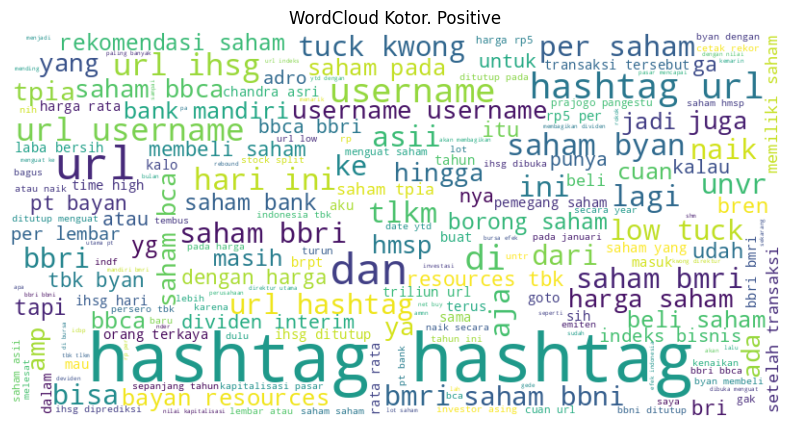

WordCloud data kotor. Sentiment: Negative


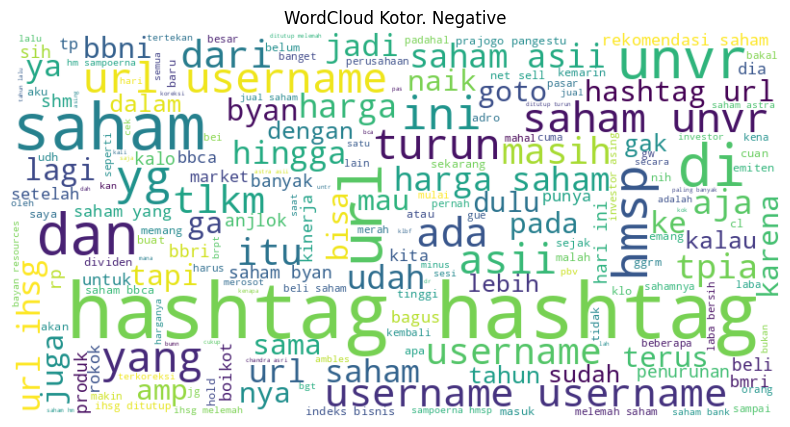

WordCloud data kotor. Sentiment: Neutral


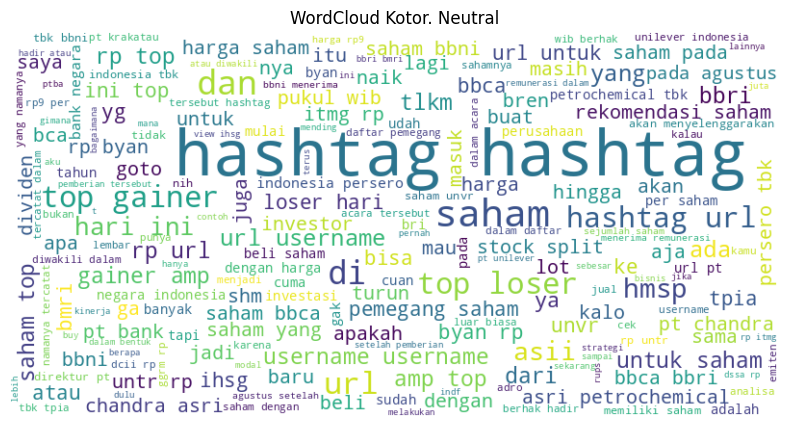

WordCloud data bersih. Sentiment: Positive


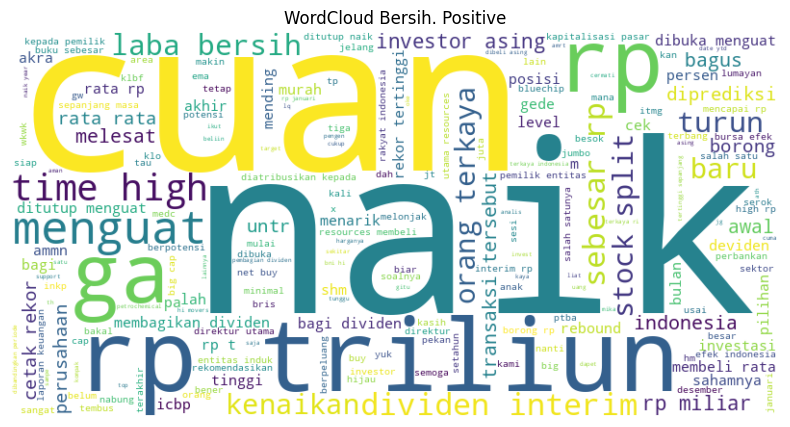

WordCloud data bersih. Sentiment: Negative


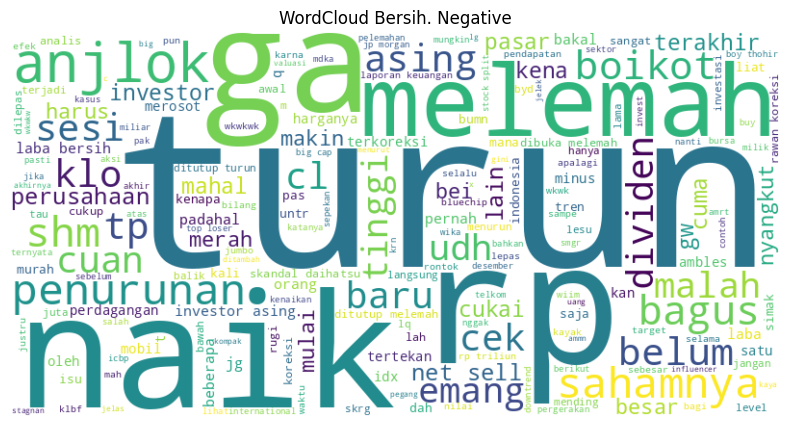

WordCloud data bersih. Sentiment: Neutral


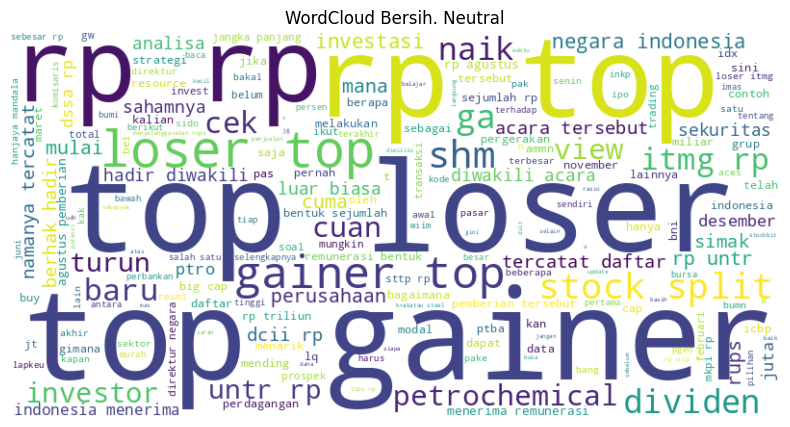

In [4]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==========================================
# 1. WORDCLOUD DATA KOTOR PER SENTIMENT
# ==========================================
def wordcloud_raw_by_sentiment(file_path, sentiment_label):
    print(f"WordCloud data kotor. Sentiment: {sentiment_label}")

    df = pd.read_csv(file_path)
    df = df[df['Sentiment'] == sentiment_label]

    def basic_clean(text):
        if not isinstance(text, str):
            return ""
        text = text.lower()
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    corpus = " ".join(df['Sentence'].apply(basic_clean))

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200
    ).generate(corpus)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Kotor. {sentiment_label}")
    plt.show()


# ==========================================
# 2. DEFINISI STOPWORDS & CLEANING
# ==========================================
STOPWORDS_ID = {
    'yang','dan','di','ke','dari','ini','itu','untuk','pada','dengan','adalah',
    'saya','kamu','dia','mereka','kita','akan','bisa','ada','tidak','yg','ya',
    'aja','gak','nya','kalo','kalau','udah','sudah','bukan','tapi','tuh','dong',
    'kok','sih','gue','lu','aku','apa','bgt','banget','juga','lagi','mau','sama',
    'banyak','bikin','buat','jadi','terus','karena','seperti','atau','saat',
    'dalam','masih','begitu','semua','bbrp','utk','sdh','dgn','dr','lebih',
    'kemarin','per','punya','setelah','menjadi','secara','lalu','memang','paling',
    'nih','dulu','hingga','sampai','sekarang','apakah','memiliki','kembali',
    'sejak','kinerja','kira','coba','nder'
}

STOPWORDS_SAHAM = {
    'saham','harga','market','indeks','lot','hari','tahun','beli','jual','hold',
    'masuk','keluar','rekomendasi','bbca','bbri','bmri','bbtn','tlkm','unvr',
    'goto','bank','bca','bbni','hmsp','tpia','bren','byan','indf','antm','asii',
    'amp','bri','mandiri','brpt','chandra','asri','tuck','wong','astra','ggrm',
    'ihsg','persero','tbk','lembar','pemegang','pbv','pukul','wib','pt','syariah',
    'low','kwong','prajogo','pangestu','bayan','adro','bisnis','emiten','rokok',
    'unilever','rdtx','sampoerna','produk'
}

ALL_STOPWORDS = STOPWORDS_ID.union(STOPWORDS_SAHAM)


def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    def clean_text(text):
        if not isinstance(text, str):
            return ""
        text = re.sub(r'\[URL\]|\[HASHTAG\]|\[USERNAME\]', '', text)
        text = text.lower()
        text = re.sub(r'[^a-z\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = [t for t in text.split() if t not in ALL_STOPWORDS]
        return ' '.join(tokens)

    df['cleaned_text'] = df['Sentence'].apply(clean_text)
    df = df.drop_duplicates(subset=['cleaned_text'])
    df = df[df['cleaned_text'].str.strip() != '']

    return df[['cleaned_text', 'Sentiment']]


# ==========================================
# 3. WORDCLOUD DATA BERSIH PER SENTIMENT
# ==========================================
def wordcloud_clean_by_sentiment(df_clean, sentiment_label):
    print(f"WordCloud data bersih. Sentiment: {sentiment_label}")

    df_sent = df_clean[df_clean['Sentiment'] == sentiment_label]
    corpus = " ".join(df_sent['cleaned_text'])

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200
    ).generate(corpus)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Bersih. {sentiment_label}")
    plt.show()


# ==========================================
# 4. EKSEKUSI PER SENTIMENT
# ==========================================
FILE_PATH = "data_dci.csv"
SENTIMENTS = ['Positive', 'Negative', 'Neutral']

for s in SENTIMENTS:
    wordcloud_raw_by_sentiment(FILE_PATH, s)

df_clean = load_and_clean_data(FILE_PATH)

for s in SENTIMENTS:
    wordcloud_clean_by_sentiment(df_clean, s)


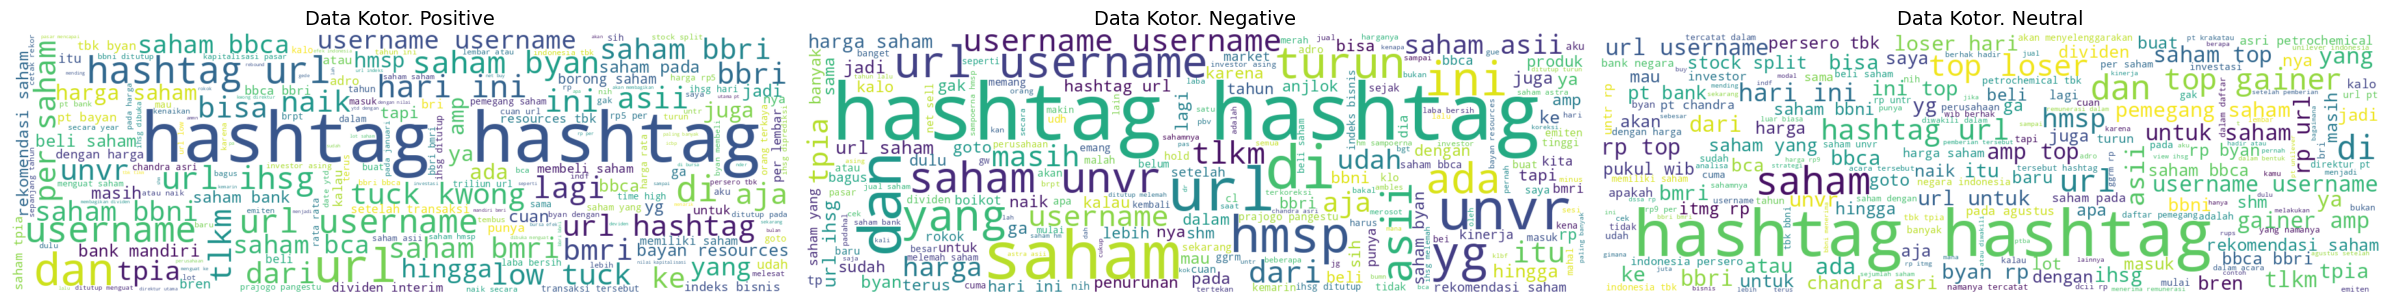

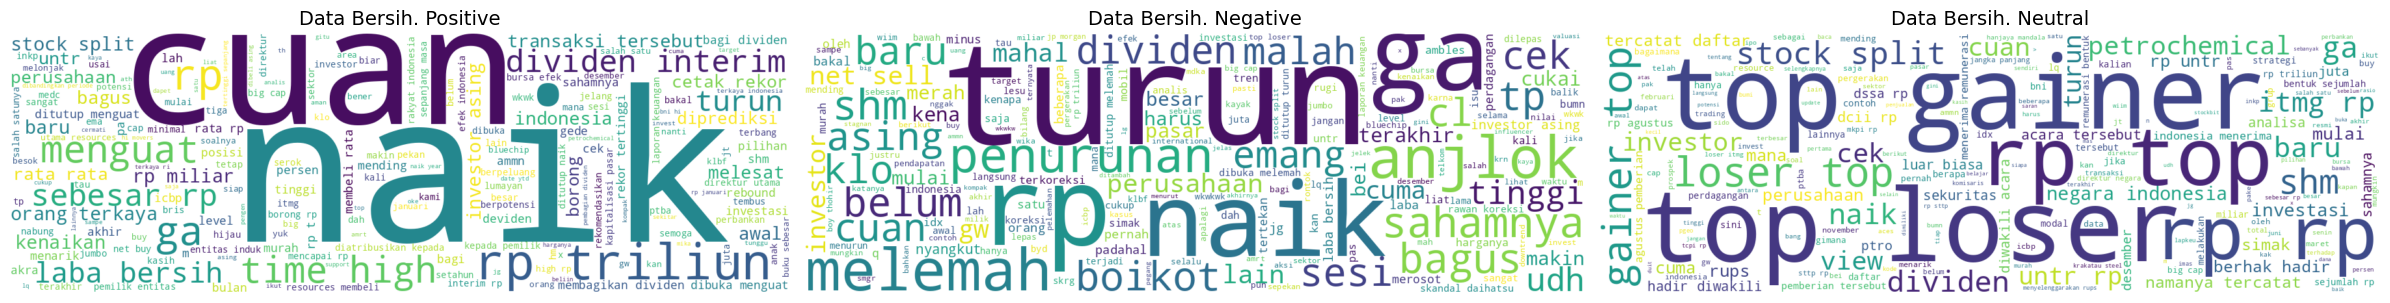

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==========================================
# 1. WORDCLOUD DATA KOTOR
# ==========================================
def wordcloud_raw_all_sentiment(file_path, sentiments):
    df = pd.read_csv(file_path)

    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    for i, sentiment in enumerate(sentiments):
        df_sent = df[df['Sentiment'] == sentiment]

        def basic_clean(text):
            if not isinstance(text, str):
                return ""
            text = text.lower()
            text = re.sub(r'\s+', ' ', text).strip()
            return text

        corpus = " ".join(df_sent['Sentence'].apply(basic_clean))

        wc = WordCloud(
            width=1200,
            height=400,
            background_color='white',
            max_words=200
        ).generate(corpus)

        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"Data Kotor. {sentiment}", fontsize=14)

    plt.tight_layout()
    plt.show()


# ==========================================
# 2. STOPWORDS & CLEANING
# ==========================================
STOPWORDS_ID = {
    'yang','dan','di','ke','dari','ini','itu','untuk','pada','dengan','adalah',
    'saya','kamu','dia','mereka','kita','akan','bisa','ada','tidak','yg','ya',
    'aja','gak','nya','kalo','kalau','udah','sudah','bukan','tapi','tuh','dong',
    'kok','sih','gue','lu','aku','apa','bgt','banget','juga','lagi','mau','sama',
    'banyak','bikin','buat','jadi','terus','karena','seperti','atau','saat',
    'dalam','masih','begitu','semua','bbrp','utk','sdh','dgn','dr','lebih',
    'kemarin','per','punya','setelah','menjadi','secara','lalu','memang','paling',
    'nih','dulu','hingga','sampai','sekarang','apakah','memiliki','kembali',
    'sejak','kinerja','kira','coba','nder'
}

STOPWORDS_SAHAM = {
    'saham','harga','market','indeks','lot','hari','tahun','beli','jual','hold',
    'masuk','keluar','rekomendasi','bbca','bbri','bmri','bbtn','tlkm','unvr',
    'goto','bank','bca','bbni','hmsp','tpia','bren','byan','indf','antm','asii',
    'amp','bri','mandiri','brpt','chandra','asri','tuck','wong','astra','ggrm',
    'ihsg','persero','tbk','lembar','pemegang','pbv','pukul','wib','pt','syariah',
    'low','kwong','prajogo','pangestu','bayan','adro','bisnis','emiten','rokok',
    'unilever','rdtx','sampoerna','produk'
}

ALL_STOPWORDS = STOPWORDS_ID.union(STOPWORDS_SAHAM)


def load_and_clean_data(file_path):
    df = pd.read_csv(file_path)

    def clean_text(text):
        if not isinstance(text, str):
            return ""
        text = re.sub(r'\[URL\]|\[HASHTAG\]|\[USERNAME\]', '', text)
        text = text.lower()
        text = re.sub(r'[^a-z\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = [t for t in text.split() if t not in ALL_STOPWORDS]
        return ' '.join(tokens)

    df['cleaned_text'] = df['Sentence'].apply(clean_text)
    df = df.drop_duplicates(subset=['cleaned_text'])
    df = df[df['cleaned_text'].str.strip() != '']

    return df[['cleaned_text', 'Sentiment']]


# ==========================================
# 3. WORDCLOUD DATA BERSIH
# ==========================================
def wordcloud_clean_all_sentiment(df_clean, sentiments):
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))

    for i, sentiment in enumerate(sentiments):
        df_sent = df_clean[df_clean['Sentiment'] == sentiment]
        corpus = " ".join(df_sent['cleaned_text'])

        wc = WordCloud(
            width=1200,
            height=400,
            background_color='white',
            max_words=200
        ).generate(corpus)

        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"Data Bersih. {sentiment}", fontsize=14)

    plt.tight_layout()
    plt.show()


# ==========================================
# 4. EKSEKUSI
# ==========================================
FILE_PATH = "data_dci.csv"
SENTIMENTS = ['Positive', 'Negative', 'Neutral']

wordcloud_raw_all_sentiment(FILE_PATH, SENTIMENTS)

df_clean = load_and_clean_data(FILE_PATH)

wordcloud_clean_all_sentiment(df_clean, SENTIMENTS)
